In [1]:
import numpy as np
import pandas as pd
import regex as re

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_theme()
sns.set_style('whitegrid')
sns.set_palette(['#FF5F5D', '#3F7C85', '#00CCBF', '#72F2EB', '#747E7E'])

# import plotly.express as px
# import plotly.graph_objects as go

import warnings
warnings.filterwarnings('ignore')


In [2]:
df_train=pd.read_csv("train.csv")
df_test=pd.read_csv("test.csv")

In [7]:
df_train.head(15)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 1. Feature Engineering
1.1 Whats in name?

In [11]:
df_train['Name'].head(15)

0                               Braund, Mr. Owen Harris
1     Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                Heikkinen, Miss. Laina
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                              Allen, Mr. William Henry
5                                      Moran, Mr. James
6                               McCarthy, Mr. Timothy J
7                        Palsson, Master. Gosta Leonard
8     Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                   Nasser, Mrs. Nicholas (Adele Achem)
10                      Sandstrom, Miss. Marguerite Rut
11                             Bonnell, Miss. Elizabeth
12                       Saundercock, Mr. William Henry
13                          Andersson, Mr. Anders Johan
14                 Vestrom, Miss. Hulda Amanda Adolfina
Name: Name, dtype: object

In [13]:
df_train['Title']=df_train['Name'].apply(lambda x:re.search('([A-Z][a-z]+)\.',x).group(1))



In [15]:
df_train['Title'].value_counts()

Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64

In France, one traditionally calls a young, unmarried woman Mademoiselle – Mlle for short – and an older, married woman Madame, whose abbreviation is Mme.

In [16]:
df_train['Title'] = df_train['Title'].replace('Mlle', 'Miss')
df_train['Title'] = df_train['Title'].replace('Mme', 'Mrs')


In [18]:
df_train['Title'].isin(['Mr', 'Mrs', 'Miss', 'Master'])

0       True
1       True
2       True
3       True
4       True
       ...  
886    False
887     True
888     True
889     True
890     True
Name: Title, Length: 891, dtype: bool

In [19]:
df_train.loc[(~df_train['Title'].isin(['Mr','Mrs','Miss','Master'])),'Title']='Rare Title'

In [21]:
df_train['Title'].value_counts()

Title
Mr            517
Miss          184
Mrs           126
Master         40
Rare Title     24
Name: count, dtype: int64

In [23]:
# perform the same task on the test dataset

df_test['Title'] = df_test['Name'].apply(lambda x: re.search(' ([A-Z][a-z]+)\.', x).group(1))

df_test['Title'] = df_test['Title'].replace('Mlle', 'Miss')
df_test['Title'] = df_test['Title'].replace('Mme', 'Mrs')

df_test.loc[(~df_test['Title'].isin(['Mr', 'Mrs', 'Miss', 'Master'])), 'Title'] = 'Rare Title'
df_train['Title'].value_counts()

Title
Mr            517
Miss          184
Mrs           126
Master         40
Rare Title     24
Name: count, dtype: int64

In [24]:
df_train['Fare'].isnull().sum()

0

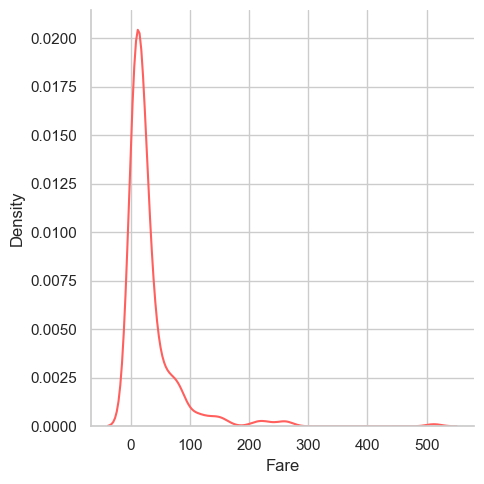

In [27]:
sns.displot(df_train, x='Fare', kind="kde")

In [29]:
len(df_train[df_train['Fare']==0])

15

In [30]:
len(df_train[df_train['Fare']<0])

0

In [35]:
df_train.loc[(df_train['Fare']==0)&(df_train['Pclass']==1),'Fare']=df_train[df_train['Pclass']==1]['Fare'].median()
df_train.loc[(df_train['Fare'] == 0) & (df_train['Pclass'] == 2), 'Fare'] = df_train[df_train['Pclass'] == 2]['Fare'].median()
df_train.loc[(df_train['Fare'] == 0) & (df_train['Pclass'] == 3), 'Fare'] = df_train[df_train['Pclass'] == 3]['Fare'].median()

In [36]:
df_train['Fare'].describe()

count    891.000000
mean      32.674620
std       49.608084
min        4.012500
25%        7.925000
50%       14.500000
75%       31.275000
max      512.329200
Name: Fare, dtype: float64

In [39]:
df_train['FareCat']=''

df_train.loc[df_train['Fare']<=10,'FareCat']='0-10'

df_train.loc[(df_train['Fare']>10)&(df_train['Fare']<=25),'FareCat']='10-25'

df_train.loc[(df_train['Fare']>25) & (df_train['Fare']<=40),'FareCat']='25-40'
df_train.loc[(df_train['Fare']>40) & (df_train['Fare']<=70),'FareCat']='40-70'
df_train.loc[(df_train['Fare']>70) & (df_train['Fare']<=100),'FareCat']='70-100'



In [40]:
df_train[['Fare','FareCat']].head()

,Fare,FareCat
0,7.2500,0-10
1,71.2833,70-100
2,7.9250,0-10
3,53.1000,40-70
4,8.0500,0-10


In [42]:
# sns.countplot(df_train,x='FareCat',hue='Survived',order=['0-10', '10-25', '25-40', '40-70', '70-100', '100+'])

In [43]:
temp = df_train.groupby(['FareCat', 'Survived'])['Survived'].count().reset_index(name='count')


In [44]:
# Applying same changes on test data set
df_test.loc[(df_test['Fare'] == 0) & (df_test['Pclass'] == 1), 'Fare'] = df_test[df_test['Pclass'] == 1]['Fare'].mean()
df_test.loc[(df_test['Fare'] == 0) & (df_test['Pclass'] == 2), 'Fare'] = df_test[df_test['Pclass'] == 2]['Fare'].mean()
df_test.loc[(df_test['Fare'] == 0) & (df_test['Pclass'] == 3), 'Fare'] = df_test[df_test['Pclass'] == 3]['Fare'].mean()
df_test['FareCat'] = ''
df_test.loc[df_test['Fare']<=10, 'FareCat'] = '0-10'
df_test.loc[(df_test['Fare']>10) & (df_test['Fare']<=25), 'FareCat'] = '10-25'
df_test.loc[(df_test['Fare']>25) & (df_test['Fare']<=40), 'FareCat'] = '25-40'
df_test.loc[(df_test['Fare']>40) & (df_test['Fare']<=70), 'FareCat'] = '40-70'
df_test.loc[(df_test['Fare']>70) & (df_test['Fare']<=100), 'FareCat'] = '70-100'
df_test.loc[df_test['Fare']>100, 'FareCat'] = '100+'